In [153]:
with open("names.txt", "r") as f:
    words = f.read().splitlines()

words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [154]:
# total words
print("Total names: ", len(words))

Total names:  32033


In [155]:
print("Minimum name length: ", min(len(w) for w in words))
print("Maximum name length: ", max(len(w) for w in words))

Minimum name length:  2
Maximum name length:  15


In [156]:
bigrams = {}
for w in words:
    #chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1

bigrams

{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

In [157]:
sorted(bigrams.items(), key = lambda item: -item[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [158]:
import torch

In [159]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [160]:
chars = sorted(list(set("".join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [161]:
# string to int mapping
stoi =  {}
for i, char in enumerate(chars):
    stoi[char] = i+1

print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [162]:
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [163]:
itos = {i+1:char for i, char in enumerate(chars)}
itos[0] = "."
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(16,16))
# plt.imshow(N, cmap='Blues')
# for i in range(27):
#     for j in range(27):
#         chstr = itos[i] + itos[j]
#         plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
#         plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
# plt.axis('off');

In [165]:
# Let's fill bigrams now into N
for w in words:
    #chs = ['<S>'] + list(w) + ['<E>']
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        itx1 = stoi[ch1]
        itx2 = stoi[ch2]
        N[itx1, itx2] += 1

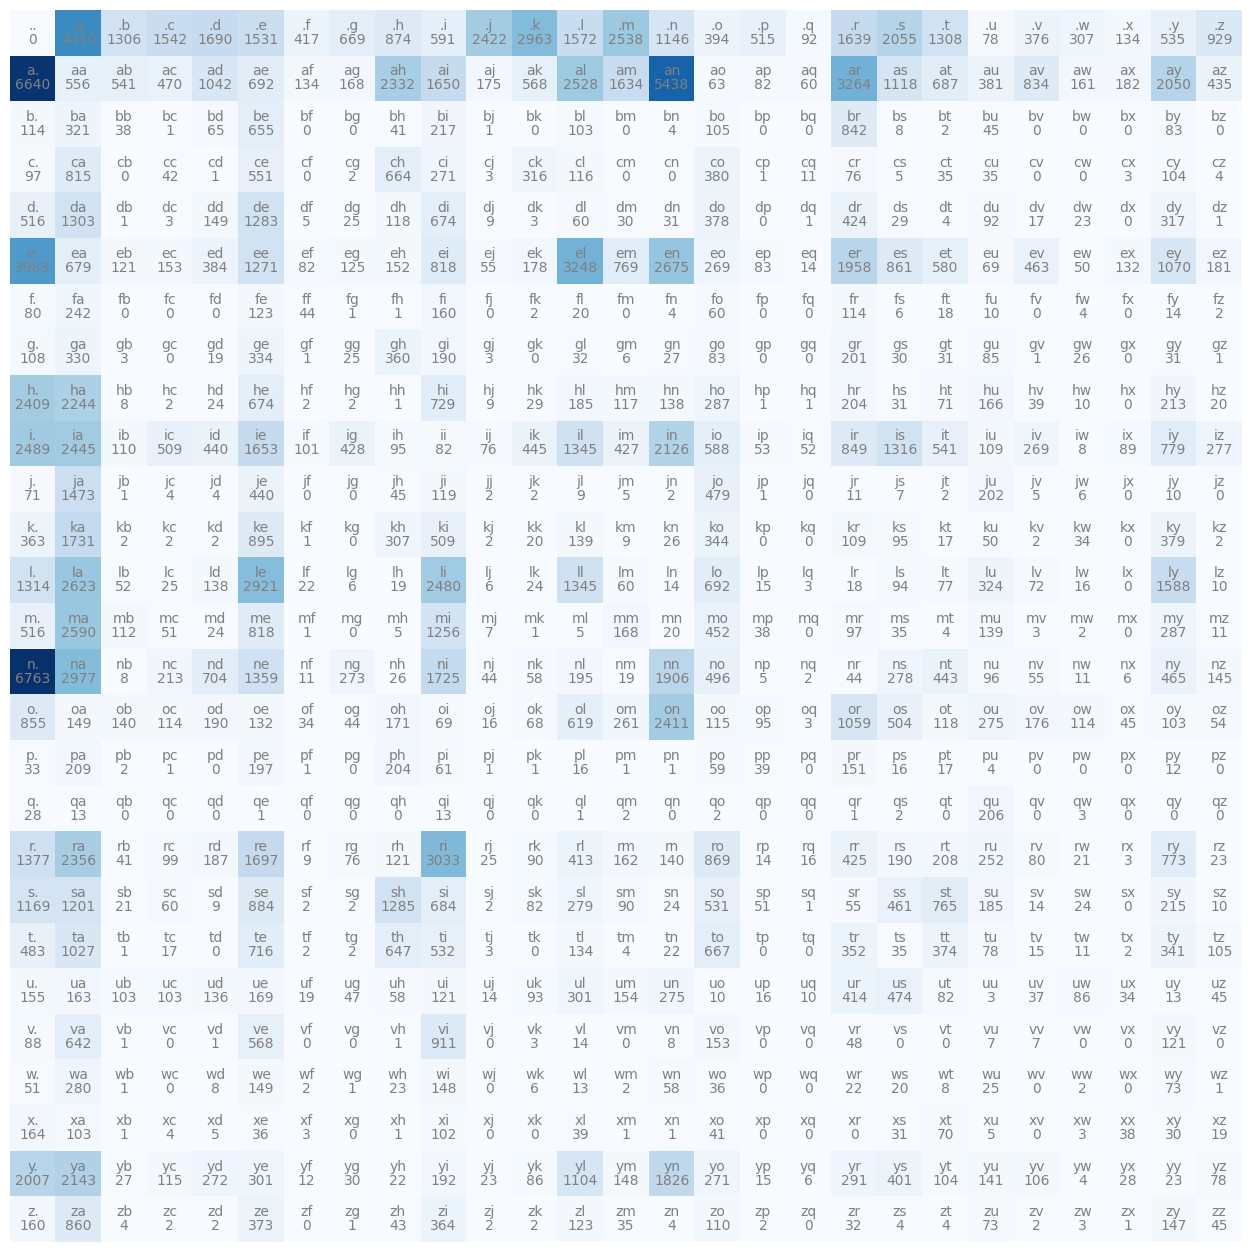

In [166]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [167]:
# Now lets'make probability distributions row wise
#sum(N[0] / sum(N[0]))
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [168]:
#P = N.float()
#P.sum(1).shape  # we need keepdim=True otherwise calculations areincorrect

In [169]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [170]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])   
        if ix==0:   # we get a "."
            break
    
    print("".join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


### We want to make a metric to measure (Quality) how good the model is. i.e we want a loss

In [171]:
# Let's fill bigrams now into N
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] # probability model assigns to these bigrams
        print(f"{ch1}{ch2}: {prob:.4f}")

# There are 27 characters. That means during initialization 1/27 should be probability of each.
# If the probability is higger than that for some that means the model has learned something
# Which it has actually
# These rpobability should be near to 1 atleast on the training set meaning the model is confident.

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3885
a.: 0.1958
.o: 0.0123
ol: 0.0779
li: 0.1774
iv: 0.0152
vi: 0.3508
ia: 0.1380
a.: 0.1958
.a: 0.1376
av: 0.0246
va: 0.2473
a.: 0.1958


### Likelihood

The product of probability distributions should be high

Log probability; which is sum of log of individual probabilitites: log(abc) = loga(a) + log(b) + log(c)

Loss function has the semantic that lower is better but with log-liklihood lower is worse so we use **negative log likelihood**



GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)

equivalent to maximizing the log likelihood (because log is monotonic)

equivalent to minimizing the negative log likelihood

equivalent to minimizing the average negative log likelihood

In [172]:
log_likelihood = 0.0
# Let's fill bigrams now into N
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] # probability model assigns to these bigrams
        logprob = torch.log(prob)   # log probability   # which is sum of log of individual probabilitites: log(abc) = loga(a) + log(b) + log(c)
        log_likelihood += logprob
        n += 1
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob: .4f}")

print(f"{log_likelihood=}")     # Maximum it can go is 0 when all probs are 1
nll = -log_likelihood
print(f"{nll/(n+1)=}")      # We want average   # the lower it is the better we are

log_likelihood=tensor(-559951.5625)
nll/(n+1)=tensor(2.4543)


We can estimate probability for any word (name)

But if we check probability for a name like **ibadqq** the model gives a loss of inf which means the probability is exactly zero.
This is highly undesirable. q followed by q occurs 0 times as you can see from the initial graph.

To tackle this we can do something like model smoothning. We will add 1 to all occurances of bigrams. It will eliminate this
problem. We could even 1000 to the counts. Adding a larger number will make the model more smooth. But here we will just add 1.

In [173]:
log_likelihood = 0.0
# Let's fill bigrams now into N
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] # probability model assigns to these bigrams
        logprob = torch.log(prob)   # log probability   # which is sum of log of individual probabilitites: log(abc) = loga(a) + log(b) + log(c)
        log_likelihood += logprob
        n += 1
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob: .4f}")

print(f"{log_likelihood=}")     # Maximum it can go is 0 when all probs are 1
nll = -log_likelihood
print(f"{nll/(n+1)=}")      # We want average   # the lower it is the better we are

log_likelihood=tensor(-559951.5625)
nll/(n+1)=tensor(2.4543)


### Now we will do try to reach the same place but with a different approach; using neural net

In [174]:
# First let's create a training set of bigrams (x, y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(f"{ch1}{ch2}: {ix1} {ix2}")

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

.e: 0 5
em: 5 13
mm: 13 13
ma: 13 1
a.: 1 0
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


#### one hot encoding

torch.Size([5, 27])


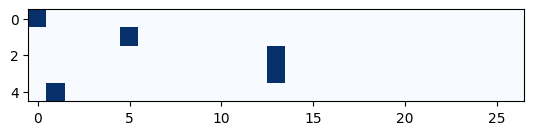

In [175]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()    # we dont want an int we want a float
print(xenc.shape)
plt.imshow(xenc, cmap='Blues')

In [176]:
xenc.dtype

torch.float32

#### Let's construct first neuron

In [177]:
W = torch.randn((27, 27))   # We created 27 neurons 
# (5, 27) @ (27, 27) = (5, 27) # all 5 inputs will be trained for all 27 possible outputs this way
xenc @ W

# W will be our only NN layer, the simplest dumbest type lol.

# For every input we want to generate a probability distibution over all possible outputs (27 here)

## We want interpret these results now somehow.
# We dont want counts directly because they are integers. What we will do is we will get log of counts from neural net.
# We will then exponentiate them to get counts back (somewhat)

# for exp(0) = 1
# for exp(>0) > 1
# for exp(<0) < 1 

# these exponentiated values will be our counts they cant be below 0.

tensor([[-7.6148e-01, -3.1424e-01,  1.9481e-02, -2.2533e-01,  4.5341e-01,
          4.2244e-01, -6.9604e-01, -1.6960e+00, -3.3331e-01,  3.7474e-01,
         -8.0611e-02, -1.1231e+00, -4.4109e-01, -1.2095e+00,  4.1020e-01,
         -1.5015e+00, -8.7129e-01,  2.9803e-01, -2.3551e+00,  3.4084e-04,
         -9.6937e-01,  6.0936e-01, -8.3752e-01,  3.3975e-01,  1.5214e+00,
         -8.9153e-01,  1.4327e+00],
        [ 9.3261e-01, -9.2786e-01, -6.2602e-01, -9.7203e-01,  7.9021e-01,
          4.0905e-01, -9.1781e-01,  1.3454e+00, -4.0126e-01, -6.0294e-01,
         -5.3656e-01,  8.8367e-01,  5.4779e-01, -3.5715e-01,  1.8984e-01,
          4.1010e-01,  1.6740e+00,  1.7788e+00, -5.2731e-01,  1.9860e+00,
          2.4396e+00, -1.4672e+00,  1.3123e+00, -6.3350e-01,  3.4797e-01,
         -8.2656e-01,  4.2729e-02],
        [ 2.1002e-01, -8.5984e-01, -9.2525e-01, -8.6639e-01, -1.2768e+00,
          3.8859e-01,  8.8408e-01,  4.0335e-01,  4.6471e-01, -6.9420e-01,
         -1.5782e+00, -1.1070e-01,  3.68

In [178]:
(xenc @ W).exp()

tensor([[ 0.4670,  0.7303,  1.0197,  0.7983,  1.5737,  1.5257,  0.4986,  0.1834,
          0.7165,  1.4546,  0.9226,  0.3253,  0.6433,  0.2983,  1.5071,  0.2228,
          0.4184,  1.3472,  0.0949,  1.0003,  0.3793,  1.8393,  0.4328,  1.4046,
          4.5785,  0.4100,  4.1900],
        [ 2.5411,  0.3954,  0.5347,  0.3783,  2.2039,  1.5054,  0.3994,  3.8397,
          0.6695,  0.5472,  0.5848,  2.4198,  1.7294,  0.6997,  1.2091,  1.5070,
          5.3336,  5.9228,  0.5902,  7.2860, 11.4683,  0.2306,  3.7148,  0.5307,
          1.4162,  0.4376,  1.0437],
        [ 1.2337,  0.4232,  0.3964,  0.4205,  0.2789,  1.4749,  2.4208,  1.4968,
          1.5916,  0.4995,  0.2063,  0.8952,  1.0376,  2.0439,  1.5409,  0.6509,
          3.6867,  0.3758,  1.1006,  1.9405,  2.2605,  2.7235,  1.7578,  0.3983,
          1.4757,  3.7407,  3.9049],
        [ 1.2337,  0.4232,  0.3964,  0.4205,  0.2789,  1.4749,  2.4208,  1.4968,
          1.5916,  0.4995,  0.2063,  0.8952,  1.0376,  2.0439,  1.5409,  0.6509

In [179]:
logits = xenc @ W # log-counts
counts = logits.exp() # counts
probs = counts / counts.sum(1, keepdim=True) # probabilities # normalizse the rows of counts: sum of every row is 1
probs[0].argmax()

tensor(24)

### Summarised

In [180]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [181]:
# randomly initialize 27 neurons weights. Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)   # We created 27 neurons

In [182]:
xenc = F.one_hot(xs, num_classes=27).float()    # input is one-hot encoded
logits = xenc @ W # log-counts
counts = logits.exp() # counts
probs = counts / counts.sum(1, keepdim=True) # probabilities # normalizse the rows of counts: sum of every row is 1
# these two previous lines are the same as softmax


In [183]:
probs.shape

torch.Size([5, 27])

In [184]:
# the forward pass is back-propagateable

In [185]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next character):

In [186]:
# Forwards pass
xenc = F.one_hot(xs, num_classes=27).float()    # input is one-hot encoded
logits = xenc @ W # log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True)   # probabilities for next character 
loss = -probs[torch.arange(5), ys].log().mean()

In [187]:
# Backwards pass
W.grad = None   # set the gradient to zero
loss.backward() # compute the gradient

In [188]:
W.grad

# W[0, 0] is positive. It means the loss will increse if this increases.
# We can use this gradient information to update the weights

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [189]:
W.data += -0.1 * W.grad

# Loss should descrease after this update

print('loss before update:', loss.item())

loss = -probs[torch.arange(5), ys].log().mean()

print('loss after update:', loss.item())
# It is slightly lower

loss before update: 3.7693049907684326
loss after update: 3.7693049907684326


## Let's train properly now

In [190]:
# Create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        #print(f"{ch1}{ch2}: {ix1} {ix2}")

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

print("Number of examples: ", num)

Number of examples:  228146


In [191]:
# randomly initialize 27 neurons weights. Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
#W = torch.randn((27, 27), generator=g, requires_grad=True)   # We created 27 neurons
W = torch.zeros((27, 27), requires_grad=True)   # We created 27 neurons

In [192]:
# gradient descent in a loop -> training

lr = 50

for k in range(300):
    # Forwards pass
    xenc = F.one_hot(xs, num_classes=27).float()    # input is one-hot encoded
    logits = xenc @ W # log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdim=True)   # probabilities for next character 
    loss = -probs[torch.arange(num), ys].log().mean()
    if k % 25 == 0:
        print('loss:', loss.item())

    # Backward pass
    W.grad = None   # set gradient to zero
    loss.backward()

    # update
    W.data += -lr * W.grad # gradient descent

# The loss is same as calculated with probability distrubuted
# We did the same thing but it is way more flexible
# static approach is not scalable but NN one is

loss: 3.295837640762329
loss: 2.52099871635437
loss: 2.4878063201904297
loss: 2.4761619567871094
loss: 2.4702982902526855
loss: 2.466809034347534
loss: 2.4645133018493652
loss: 2.4628946781158447
loss: 2.4616944789886475
loss: 2.4607694149017334
loss: 2.4600346088409424
loss: 2.459437370300293


### Regularisation

In [193]:
# randomly initialize 27 neurons weights. Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
#W = torch.randn((27, 27), generator=g, requires_grad=True)   # We created 27 neurons
W = torch.zeros((27, 27), requires_grad=True)   # We created 27 neurons

In [194]:
# gradient descent in a loop -> training

lr = 50
alpha = 0.01

for k in range(300):
    # Forwards pass
    xenc = F.one_hot(xs, num_classes=27).float()    # input is one-hot encoded
    logits = xenc @ W # log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdim=True)   # probabilities for next character 
    
    # regularised loss
    loss = -probs[torch.arange(num), ys].log().mean() + (alpha * (W**2).mean())
    if k % 25 == 0:
        print('loss:', loss.item())

    # Backward pass
    W.grad = None   # set gradient to zero
    loss.backward()

    # update
    W.data += -lr * W.grad # gradient descent

loss: 3.295837640762329
loss: 2.529900074005127
loss: 2.500406265258789
loss: 2.491044044494629
loss: 2.4867959022521973
loss: 2.4845311641693115
loss: 2.4832026958465576
loss: 2.482370615005493
loss: 2.4818227291107178
loss: 2.4814486503601074
loss: 2.4811856746673584
loss: 2.4809961318969727


### Effect of regularization

In [195]:
# regularisation here will want to make W elements smaller (0 best case for it)
# the regular loss will try to make the probility distribution according to training data
# regularisation is similar to smoothening that we did before
# Increasing counts: (N + 1)    or even (N + 10)

### Sample from neural net model

In [198]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

# same output as before exactly.
# identical models and acheive the same loss
# mor.
# axx.
# minaymoryles.
# kondlaisah.
# anchshizarie.

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
